# Decision Trees and Random Forests example using the wine database
The problem in this base is identify the wine productor based on wine features

In [1]:
import numpy as np  
import matplotlib.pyplot as plt

## Load the dataset and convert it to pandas data frame

In [2]:
from sklearn import datasets
import pandas as pd

data = datasets.load_wine()
# convert sklearn dataset to pandas data frame
wine = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])

wine.info()
wine.head()

/Users/jpm/.pyenv/versions/3.8.0/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [3]:
wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## Split the dataset
First into input features (X) and output (y) and then into train and test sets with size 0.7/0.3

In [4]:
from sklearn.model_selection import train_test_split

X = wine.drop('target', axis=1)
y = wine['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Create and train the Decision Tree Classifier

In [5]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Use the model to predict the samples in the train set

In [15]:
train_predictions = model.predict(X_train)

## Evaluate the model

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_train,train_predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        46
         1.0       1.00      1.00      1.00        46
         2.0       1.00      1.00      1.00        32

    accuracy                           1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124



## Display the confusion matrix 

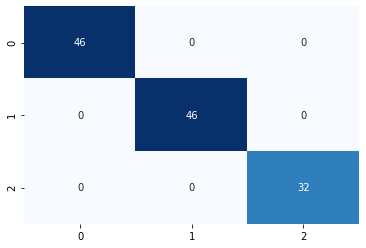

In [17]:
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

cfm = confusion_matrix(y_train,train_predictions)
sns.heatmap(cfm, cbar=False, annot=True, cmap="Blues", fmt="d")

## Use the model to predict the samples in the test set

In [6]:
predictions = model.predict(X_test)

## Evaluate the model

In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.91      0.77      0.83        13
         1.0       0.86      0.96      0.91        25
         2.0       1.00      0.94      0.97        16

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54



## Display the confusion matrix 

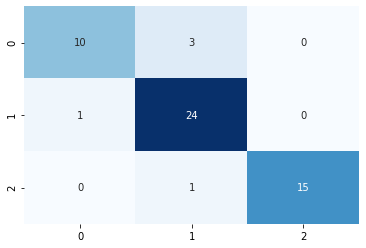

In [8]:
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

cfm = confusion_matrix(y_test,predictions)
sns.heatmap(cfm, cbar=False, annot=True, cmap="Blues", fmt="d")

## Let's create an image with the decision tree
You'll need some extra libs (IPython and pydot)
* Each OS may require other specific installs.
Mac OS users for example need to install other dependencies. In my case, installing gprofdot (brew install gprof2dot) was enough.

/Users/jpm/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/externals/six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "


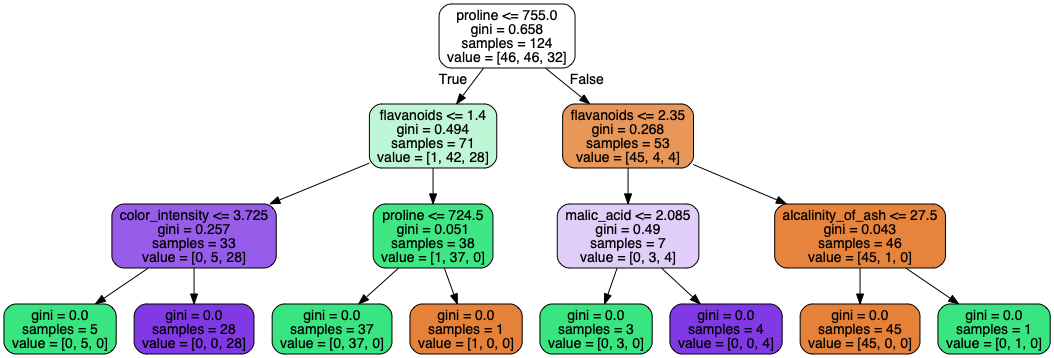

In [9]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(wine.columns[:-1])
features

dot_data = StringIO()  
export_graphviz(model, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
img = Image(graph[0].create_png())
graph[0].write_png('tree_wine_viz.png')
img

# Random Forests
One tree performed well but lets see if Random Forest can improve the result.
## Create a Random Forest with 100 trees
Evaluate the result and then display the confusion matrix

In [10]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)
predictions = forest.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       1.00      0.96      0.98        25
         2.0       0.94      1.00      0.97        16

    accuracy                           0.98        54
   macro avg       0.98      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54



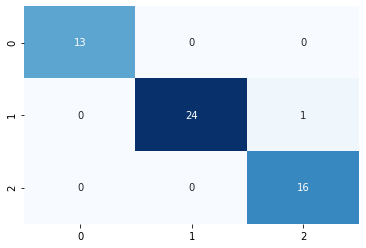

In [11]:
cfm = confusion_matrix(y_test,predictions)
sns.heatmap(cfm, cbar=False, annot=True, cmap="Blues", fmt="d")

## Lets try using pipeline and search the best parameters using cross-validation 
### First using GridSearch

In [47]:
list(range(5,100,10))

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

search_paramns = [{
    'forest__n_estimators': list(range(5,100,10)), 
    'forest__criterion': ["gini", "entropy"],
    'forest__max_features': ["sqrt", "log2"],
}]

pipe = Pipeline([
    ('forest', RandomForestClassifier())
])

search = GridSearchCV(estimator=pipe,
                     param_grid=search_paramns,
                     cv=5,
                     return_train_score=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
%%time
search.fit(X_train, y_train)
search.cv_results_

CPU times: user 12.3 s, sys: 50.2 ms, total: 12.4 s
Wall time: 12.4 s


{'mean_fit_time': array([0.00824838, 0.01758709, 0.02614136, 0.03664222, 0.0499795 ,
        0.06333833, 0.06675272, 0.07853298, 0.08707242, 0.09353504,
        0.0059741 , 0.01610003, 0.02520585, 0.03416095, 0.04474268,
        0.05415921, 0.06477585, 0.07447886, 0.08307505, 0.0908886 ,
        0.00581555, 0.01572576, 0.02617865, 0.03532305, 0.04569678,
        0.05474143, 0.07125101, 0.07564836, 0.08863716, 0.10222135,
        0.00669842, 0.01814532, 0.0287168 , 0.03910627, 0.04880776,
        0.05788608, 0.07341075, 0.08126397, 0.09380937, 0.10480285]),
 'std_fit_time': array([7.52386579e-04, 8.71459724e-04, 1.81819117e-03, 2.45652956e-03,
        2.59148260e-03, 2.60777542e-03, 2.90549288e-03, 3.64950735e-03,
        1.92507708e-03, 2.64080450e-03, 7.71755306e-05, 9.93338117e-04,
        4.60468956e-04, 3.79264256e-04, 2.04182313e-03, 1.76600747e-03,
        1.11535213e-03, 2.52034723e-03, 2.07634281e-03, 4.04894013e-04,
        6.42236814e-05, 4.51787407e-04, 1.66111622e-03, 6.983

In [35]:
search.cv_results_.get('mean_test_score')

array([0.92906404, 0.97192118, 0.96477833, 0.97881773, 0.97167488,
       0.97881773, 0.97881773, 0.97192118, 0.97881773, 0.97881773,
       0.95073892, 0.97881773, 0.97881773, 0.96502463, 0.97881773,
       0.97192118, 0.97881773, 0.97192118, 0.97881773, 0.97881773,
       0.90197044, 0.96502463, 0.95812808, 0.96502463, 0.96527094,
       0.98596059, 0.98596059, 0.97881773, 0.97192118, 0.97906404,
       0.95837438, 0.96477833, 0.96502463, 0.96502463, 0.97192118,
       0.96502463, 0.97192118, 0.96502463, 0.97881773, 0.97192118])

In [36]:
search.cv_results_.get('mean_train_score')

array([0.99472132, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99472132, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.98939606, 0.99824561, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99470579, 0.99824561, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [37]:
search.best_params_

{'forest__criterion': 'entropy',
 'forest__max_features': 'sqrt',
 'forest__n_estimators': 55}

In [38]:
search.best_estimator_

Pipeline(memory=None,
         steps=[('forest',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=55, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       1.00      1.00      1.00        14
         2.0       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



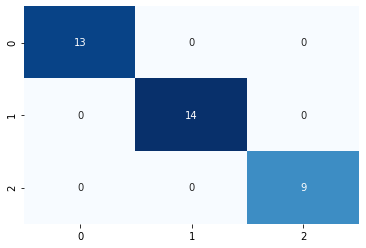

In [39]:
y_pred = search.predict(X_test)
print(classification_report(y_test, y_pred))

cfm = confusion_matrix( y_test, y_pred )
sns.heatmap(cfm, cbar=False, annot=True, cmap="Blues", fmt="d")

### And now using Random Search CV

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

search_paramns = [{
    'forest__n_estimators': list(range(5,100,10)), 
    'forest__criterion': ["gini", "entropy"],
    'forest__max_features': ["sqrt", "log2"],
}]

pipe = Pipeline([
    ('forest', RandomForestClassifier())
])

search = RandomizedSearchCV(pipe,
                     search_paramns,
                     cv=5,
                     return_train_score=True,
                     random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
%%time
search.fit(X_train, y_train)
search.cv_results_

CPU times: user 4.01 s, sys: 16.7 ms, total: 4.03 s
Wall time: 4.03 s


{'mean_fit_time': array([0.0956872 , 0.06600575, 0.05844712, 0.06461201, 0.04414234,
        0.0254096 , 0.07335596, 0.07672977, 0.10352173, 0.06631169]),
 'std_fit_time': array([0.00664779, 0.00179311, 0.00308694, 0.00180553, 0.00048743,
        0.00129657, 0.00072665, 0.00528102, 0.00290182, 0.00180704]),
 'mean_score_time': array([0.00702162, 0.00506582, 0.00451827, 0.00499039, 0.00349679,
        0.00232425, 0.00574222, 0.00595107, 0.00746832, 0.00508976]),
 'std_score_time': array([5.38986431e-04, 3.08793743e-04, 2.16410221e-04, 2.85757469e-04,
        4.55444641e-05, 8.58112949e-05, 5.61255780e-04, 5.21491549e-04,
        2.61666084e-04, 3.98804319e-04]),
 'param_forest__n_estimators': masked_array(data=[95, 65, 55, 65, 45, 25, 75, 75, 95, 65],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_forest__max_features': masked_array(data=['log2', 'log2', 'log2', 's

In [42]:
search.cv_results_.get('mean_test_score')

array([0.98596059, 0.98596059, 0.96453202, 0.98596059, 0.98571429,
       0.97192118, 0.97167488, 0.98596059, 0.98596059, 0.97881773])

In [43]:
search.cv_results_.get('mean_train_score')

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [44]:
search.best_params_

{'forest__n_estimators': 95,
 'forest__max_features': 'log2',
 'forest__criterion': 'gini'}

In [45]:
search.best_estimator_

Pipeline(memory=None,
         steps=[('forest',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='log2',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=95, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      0.93      0.97        15
         2.0       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



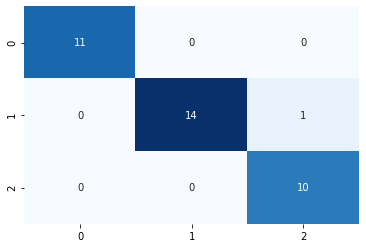

In [46]:
y_pred = search.predict(X_test)
print(classification_report(y_test, y_pred))

cfm = confusion_matrix( y_test, y_pred )
sns.heatmap(cfm, cbar=False, annot=True, cmap="Blues", fmt="d")